<a href="https://colab.research.google.com/github/tenacioussami/Machine-learning-/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Its a mobile review sentiment datasets

## **Font family setup**

In [ ]:
import matplotlib
# Set font size and family for the entire figure
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'

## **Importing Dataset**

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/datasets/Mobile Reviews Sentiment.csv')

## **Basic Information**

In [ ]:
df

,review_id,customer_name,age,brand,model,price_usd,price_local,currency,exchange_rate_to_usd,rating,...,verified_purchase,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,review_length,word_count,helpful_votes,source
0,1,Aryan Maharaj,45,Realme,Realme 12 Pro,337.31,₹27996.73,INR,83.00,2,...,True,1,1,3,2,1,46,7,1,Amazon
1,2,Davi Miguel Sousa,18,Realme,Realme 12 Pro,307.78,R$1754.35,BRL,5.70,4,...,True,3,2,4,3,2,74,12,5,Flipkart
2,3,Pahal Balay,27,Google,Pixel 6,864.53,₹71755.99,INR,83.00,4,...,True,3,5,3,2,4,55,11,8,AliExpress
3,4,David Guzman,19,Xiaomi,Redmi Note 13,660.94,د.إ2425.65,AED,3.67,3,...,False,1,3,2,1,2,66,11,3,Amazon
4,5,Yago Leão,38,Motorola,Edge 50,792.13,R$4515.14,BRL,5.70,3,...,True,3,3,2,2,1,73,12,0,BestBuy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,Rebecca Pratt,18,Realme,Realme 12 Pro,526.10,A$804.93,AUD,1.53,4,...,False,3,3,4,3,5,60,12,4,BestBuy
49996,49997,Dr. Tiffany Patterson,28,Samsung,Galaxy Note 20,911.85,A$1395.13,AUD,1.53,3,...,False,3,2,4,1,3,64,11,2,AliExpress
49997,49998,Alexandra Singh,21,Apple,iPhone SE,1155.32,د.إ4240.02,AED,3.67,5,...,True,2,3,4,4,5,64,11,4,Amazon
49998,49999,Robert Morris,31,Realme,Realme Narzo 70,459.04,$459.04,USD,1.00,3,...,True,1,2,2,1,3,56,10,6,AliExpress


In [ ]:
df.shape

(50000, 25)

In [ ]:
df['source'].value_counts()

,count
source,
eBay,10052
AliExpress,10015
Amazon,10014
Flipkart,9978
BestBuy,9941


## **Data Samples per Class**

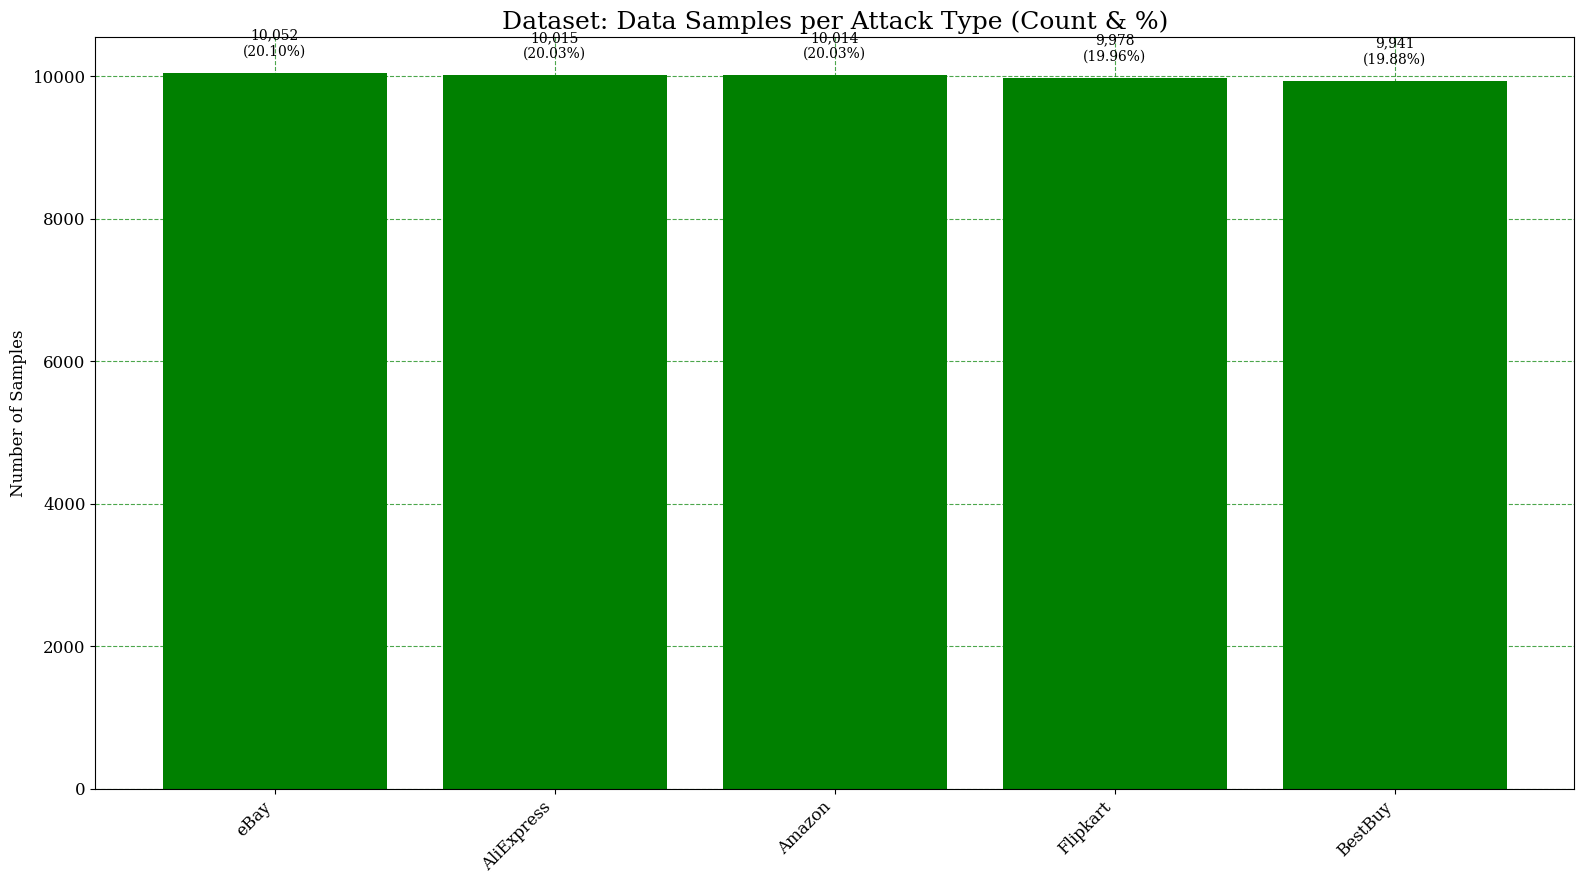

In [ ]:
import matplotlib.pyplot as plt

# Count samples and percentages
label_counts = df['source'].value_counts()
label_percentages = (label_counts / label_counts.sum()) * 100

# Set up the plot
plt.figure(figsize=(16, 9))
bars = plt.bar(label_counts.index, label_counts.values, color='green')  # Bar color set to green

# Add count and percentage text above each bar
for idx, bar in enumerate(bars):
    height = bar.get_height()
    count_text = f'{label_counts.values[idx]:,}'
    percent_text = f'({label_percentages.values[idx]:.2f}%)'

    plt.text(
        bar.get_x() + bar.get_width()/2, height + 0.02*height,
        f'{count_text}\n{percent_text}',
        ha='center', va='bottom', fontsize=10
    )

# Titles and labels
plt.title('Dataset: Data Samples per Attack Type (Count & %)', fontsize=18)
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
#plt.grid(axis='y', linestyle='--', alpha=0.7, color='green')  # Grid color set to green
# Enable both horizontal and vertical green grid lines
plt.grid(axis='both', linestyle='--', alpha=0.7, color='green')

plt.tight_layout()

# Show plot
plt.show()


## **Handle Missing Values**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

print("Columns with Missing Values:\n", missing_values)


# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if missing values are filled
print("Missing values after filling:\n", df.isnull().sum().sum())  # Should be 0 if all missing values are handled



Columns with Missing Values:
 Series([], dtype: int64)
Missing values after filling:
 0


In [ ]:
# Print the names of the features (columns)
print(df.columns)

Index(['review_id', 'customer_name', 'age', 'brand', 'model', 'price_usd',
       'price_local', 'currency', 'exchange_rate_to_usd', 'rating',
       'review_text', 'sentiment', 'country', 'language', 'review_date',
       'verified_purchase', 'battery_life_rating', 'camera_rating',
       'performance_rating', 'design_rating', 'display_rating',
       'review_length', 'word_count', 'helpful_votes', 'source'],
      dtype='object')


## **Data Preprocessing**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Preprocessing steps
# Replace infinity and large values with NaNs
df = df.replace([np.inf, -np.inf], np.nan)
df = df.replace(to_replace=[r'^(-?\d+\.\d+e\+\d+|-?\d+\.\d+e-\d+|-?\d+\.\d+|-?\d+)$', r'^(-?\d+)$'], value=np.nan, regex=True)

# Drop rows containing NaNs
df.dropna(inplace=True)

# Separate numerical and categorical columns, excluding the 'Label' column from categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = cat_cols.difference(['Label'])

# Normalize numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Ensure all categorical values are strings
df[cat_cols] = df[cat_cols].astype(str)

# Encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

# Display the processed DataFrame
df

,review_id,customer_name,age,brand,model,price_usd,price_local,currency,exchange_rate_to_usd,rating,...,verified_purchase,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,review_length,word_count,helpful_votes,source
0,-1.732016,3762,1.671080,4,15,-1.135607,43737,6,2.671709,-0.899504,...,True,-1.274238,-1.277067,0.207813,-0.531484,-1.273035,-2.094319,-1.851514,-1.086923,1
1,-1.731947,9834,-1.352024,4,15,-1.230772,18858,2,-0.239443,0.702291,...,True,0.209159,-0.533566,0.948996,0.212933,-0.533449,1.397992,0.703130,0.557327,3
2,-1.731878,34216,-0.344323,1,10,0.563435,47244,6,2.671709,0.702291,...,True,0.209159,1.696937,0.207813,-0.531484,0.945723,-0.971790,0.192201,1.790513,0
3,-1.731808,9946,-1.240057,6,17,-0.092663,33235,0,-0.315894,-0.098606,...,False,-1.274238,0.209935,-0.533370,-1.275902,-0.533449,0.400189,0.192201,-0.264798,1
4,-1.731739,45298,0.887312,2,0,0.330116,22333,2,-0.239443,-0.098606,...,True,0.209159,0.209935,-0.533370,-0.531484,-1.273035,1.273267,0.703130,-1.497985,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.731739,36281,-1.352024,4,15,-0.527204,11327,1,-0.396487,0.702291,...,False,0.209159,0.209935,0.948996,0.212933,1.685310,-0.348163,0.703130,0.146264,2
49996,1.731808,12813,-0.232356,5,2,0.715931,7702,1,-0.396487,-0.098606,...,False,0.209159,-0.533566,0.948996,-1.275902,0.206137,0.150738,0.192201,-0.675860,0
49997,1.731878,1008,-1.016124,0,21,1.500548,35556,0,-0.315894,1.503188,...,True,-0.532540,0.209935,0.948996,0.957351,1.685310,0.150738,0.192201,0.146264,1
49998,1.731947,37077,0.103545,4,16,-0.743315,2634,7,-0.416447,-0.098606,...,True,-1.274238,-0.533566,-0.533370,-1.275902,0.206137,-0.847065,-0.318728,0.968389,0


In [ ]:
# The column 'Unnamed: 0' does not exist in the dataframe, so dropping it is not necessary.
# df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df

,review_id,customer_name,age,brand,model,price_usd,price_local,currency,exchange_rate_to_usd,rating,...,verified_purchase,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,review_length,word_count,helpful_votes,source
0,-1.732016,3762,1.671080,4,15,-1.135607,43737,6,2.671709,-0.899504,...,True,-1.274238,-1.277067,0.207813,-0.531484,-1.273035,-2.094319,-1.851514,-1.086923,1
1,-1.731947,9834,-1.352024,4,15,-1.230772,18858,2,-0.239443,0.702291,...,True,0.209159,-0.533566,0.948996,0.212933,-0.533449,1.397992,0.703130,0.557327,3
2,-1.731878,34216,-0.344323,1,10,0.563435,47244,6,2.671709,0.702291,...,True,0.209159,1.696937,0.207813,-0.531484,0.945723,-0.971790,0.192201,1.790513,0
3,-1.731808,9946,-1.240057,6,17,-0.092663,33235,0,-0.315894,-0.098606,...,False,-1.274238,0.209935,-0.533370,-1.275902,-0.533449,0.400189,0.192201,-0.264798,1
4,-1.731739,45298,0.887312,2,0,0.330116,22333,2,-0.239443,-0.098606,...,True,0.209159,0.209935,-0.533370,-0.531484,-1.273035,1.273267,0.703130,-1.497985,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.731739,36281,-1.352024,4,15,-0.527204,11327,1,-0.396487,0.702291,...,False,0.209159,0.209935,0.948996,0.212933,1.685310,-0.348163,0.703130,0.146264,2
49996,1.731808,12813,-0.232356,5,2,0.715931,7702,1,-0.396487,-0.098606,...,False,0.209159,-0.533566,0.948996,-1.275902,0.206137,0.150738,0.192201,-0.675860,0
49997,1.731878,1008,-1.016124,0,21,1.500548,35556,0,-0.315894,1.503188,...,True,-0.532540,0.209935,0.948996,0.957351,1.685310,0.150738,0.192201,0.146264,1
49998,1.731947,37077,0.103545,4,16,-0.743315,2634,7,-0.416447,-0.098606,...,True,-1.274238,-0.533566,-0.533370,-1.275902,0.206137,-0.847065,-0.318728,0.968389,0


## **After Processing**

In [ ]:
df['source'].value_counts()

,count
source,
4,10052
0,10015
1,10014
3,9978
2,9941


In [ ]:
####Copy the processed df to different df

df1 = df.copy()
df2 = df.copy()

# **Binary Class (Anomaly) Classification**

In [ ]:
df1['source'] = df1['source'].apply(lambda x: 'eBay' if x == 'eBay' else 'AliExpress')

In [ ]:
# Check counts
print(df1['source'].value_counts())

source
AliExpress    50000
Name: count, dtype: int64


In [ ]:
# Define label and feature columns
X = df1.drop(columns=['source'])
y = df1['source']

## **Traing and Test Division**

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                   # Features and target
    test_size=0.3,          # 20% test, 80% train
    random_state=42,        # For reproducibility
)

# Confirm sizes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")


X_train shape: (35000, 24)
X_test shape:  (15000, 24)
y_train shape: (35000,)
y_test shape:  (15000,)


## **Train & Evaluate Decision Tree Classifier**

Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000


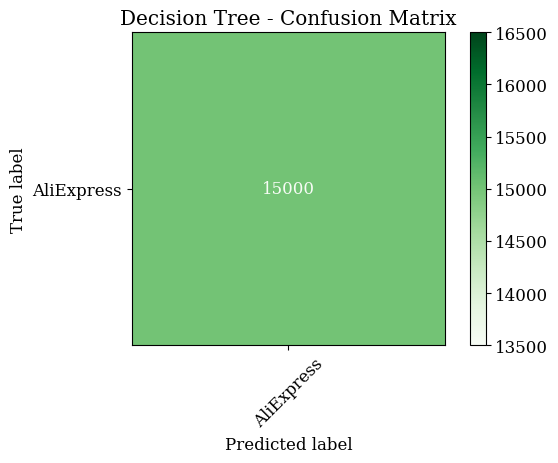

Classification Report:
              precision    recall  f1-score   support

  AliExpress    1.00000   1.00000   1.00000     15000

    accuracy                        1.00000     15000
   macro avg    1.00000   1.00000   1.00000     15000
weighted avg    1.00000   1.00000   1.00000     15000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = dt_model.predict(X_test)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=dt_model.classes_).plot(cmap='Greens', xticks_rotation=45)
plt.title("Decision Tree - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

## **Train & Evaluate Random Forest Classifier**

Accuracy:  1.00000
Precision: 1.00000
Recall:    1.00000
F1 Score:  1.00000


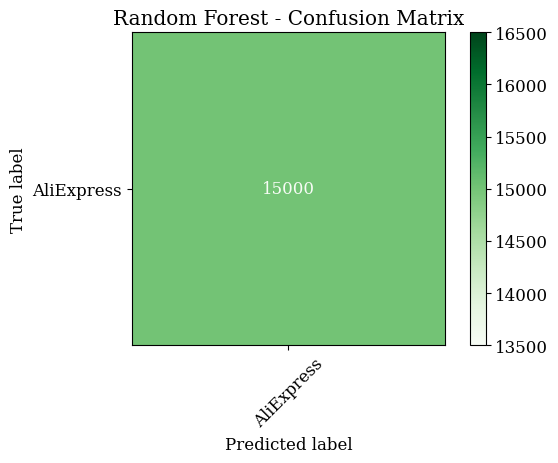

Classification Report:
              precision    recall  f1-score   support

  AliExpress    1.00000   1.00000   1.00000     15000

    accuracy                        1.00000     15000
   macro avg    1.00000   1.00000   1.00000     15000
weighted avg    1.00000   1.00000   1.00000     15000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = rf_model.predict(X_test)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics (5-digit precision)
print(f"Accuracy:  {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall:    {recall:.5f}")
print(f"F1 Score:  {f1:.5f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_).plot(cmap='Greens', xticks_rotation=45)
plt.title("Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report (5-digit precision)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

## **Train & Evaluate KNN Classifier**

Accuracy:  1.00000
Precision: 1.00000
Recall:    1.00000
F1 Score:  1.00000


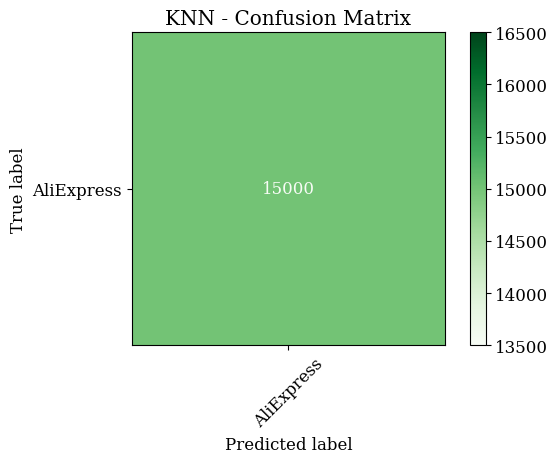

Classification Report:
              precision    recall  f1-score   support

  AliExpress    1.00000   1.00000   1.00000     15000

    accuracy                        1.00000     15000
   macro avg    1.00000   1.00000   1.00000     15000
weighted avg    1.00000   1.00000   1.00000     15000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = knn_model.predict(X_test)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics (5-digit precision)
print(f"Accuracy:  {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall:    {recall:.5f}")
print(f"F1 Score:  {f1:.5f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=knn_model.classes_).plot(cmap='Greens', xticks_rotation=45)
plt.title("KNN - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report (5-digit precision)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

# **Multiclass Classification**

In [ ]:
# Define label and feature columns
X = df2.drop(columns=['source'])
y = df2['source']

## **Traing and Test Division**

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                   # Features and target
    test_size=0.2,          # 20% test, 80% train
    random_state=42,        # For reproducibility
    stratify=y              # Ensures class distribution is preserved
)

# Confirm sizes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")


X_train shape: (40000, 24)
X_test shape:  (10000, 24)
y_train shape: (40000,)
y_test shape:  (10000,)


## **Train & Evaluate Decision Tree Classifier**

Accuracy:  0.1983
Precision: 0.1983
Recall:    0.1983
F1 Score:  0.1983


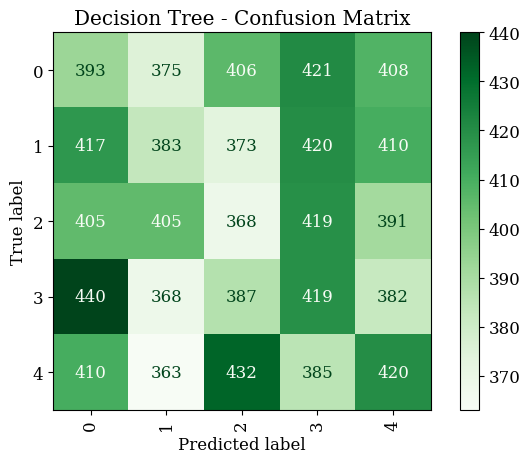

Classification Report:
              precision    recall  f1-score   support

           0    0.19031   0.19621   0.19322      2003
           1    0.20222   0.19121   0.19656      2003
           2    0.18718   0.18511   0.18614      1988
           3    0.20300   0.20992   0.20640      1996
           4    0.20885   0.20896   0.20890      2010

    accuracy                        0.19830     10000
   macro avg    0.19831   0.19828   0.19824     10000
weighted avg    0.19833   0.19830   0.19826     10000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = dt_model.predict(X_test)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=dt_model.classes_).plot(cmap='Greens', xticks_rotation=90)
plt.title("Decision Tree - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

## **Train & Evaluate Random Forest Classifier**

Accuracy:  0.19820
Precision: 0.19890
Recall:    0.19820
F1 Score:  0.19544


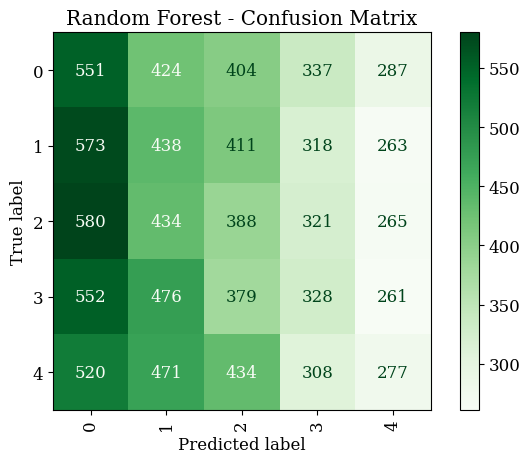

Classification Report:
              precision    recall  f1-score   support

           0    0.19849   0.27509   0.23059      2003
           1    0.19527   0.21867   0.20631      2003
           2    0.19246   0.19517   0.19381      1988
           3    0.20347   0.16433   0.18182      1996
           4    0.20473   0.13781   0.16473      2010

    accuracy                        0.19820     10000
   macro avg    0.19889   0.19821   0.19545     10000
weighted avg    0.19890   0.19820   0.19544     10000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators = 10, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics (5-digit precision)
print(f"Accuracy:  {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall:    {recall:.5f}")
print(f"F1 Score:  {f1:.5f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=rf_model.classes_).plot(cmap='Greens', xticks_rotation=90)
plt.title("Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report (5-digit precision)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

## **Train & Evaluate KNN Classifier**

Accuracy:  0.19820
Precision: 0.19861
Recall:    0.19820
F1 Score:  0.19469


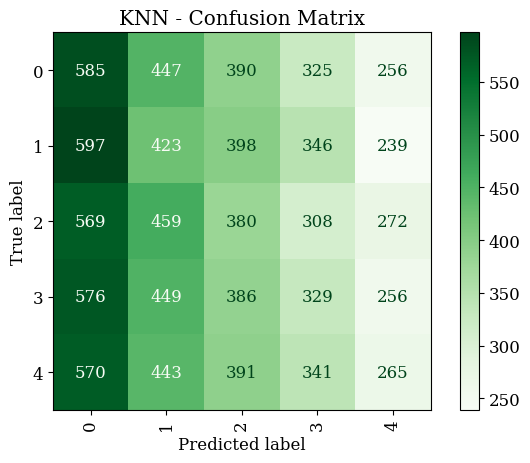

Classification Report:
              precision    recall  f1-score   support

           0    0.20193   0.29206   0.23878      2003
           1    0.19045   0.21118   0.20028      2003
           2    0.19537   0.19115   0.19324      1988
           3    0.19951   0.16483   0.18052      1996
           4    0.20575   0.13184   0.16070      2010

    accuracy                        0.19820     10000
   macro avg    0.19860   0.19821   0.19470     10000
weighted avg    0.19861   0.19820   0.19469     10000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = knn_model.predict(X_test)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics (5-digit precision)
print(f"Accuracy:  {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall:    {recall:.5f}")
print(f"F1 Score:  {f1:.5f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=knn_model.classes_).plot(cmap='Greens', xticks_rotation=90)
plt.title("KNN - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report (5-digit precision)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

# **Modified Confusion Matrix**

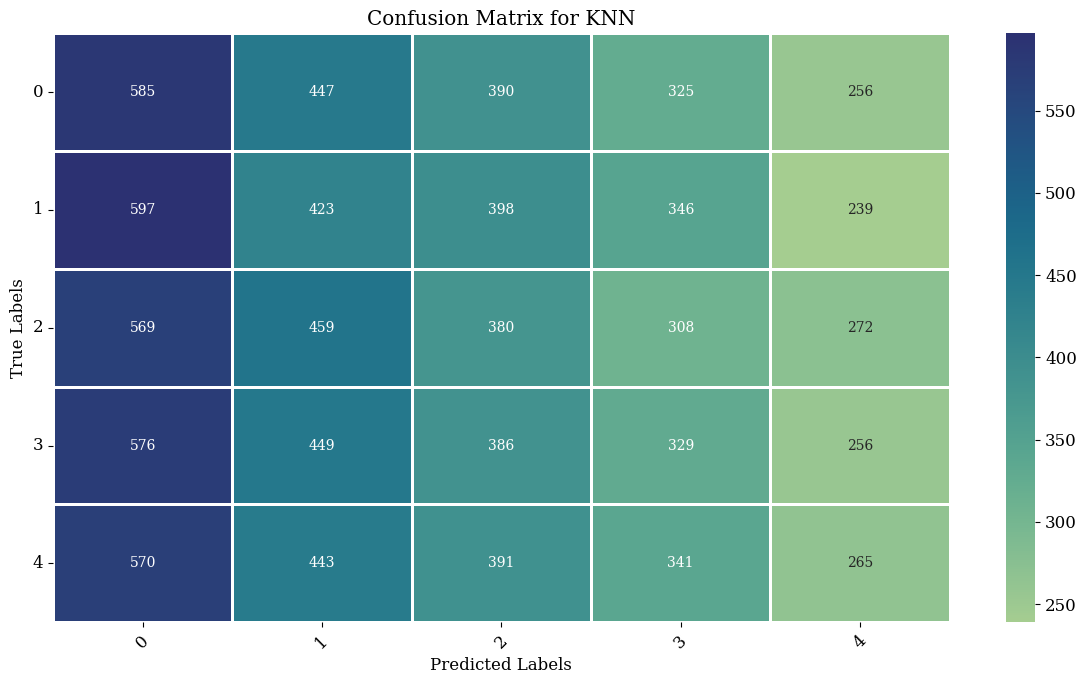

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred)

# Colormap
cmap = sns.color_palette("crest", as_cmap=True)

# Automatically get class labels from model
class_labels = knn_model.classes_

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Plot CM
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 10}, linewidths=1, linecolor='white')

ax.set_title("Confusion Matrix for KNN")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels, rotation=0)

plt.tight_layout()
plt.show()


# **Thank you Everyone!**